# Measures of central tendency
Measures of central tendency describe the center point of a dataset. They are useful in summarizing data, as they represent a typical value around which other data points cluster. The three most common measures are `mean`, `median`, and `mode`.

## Mean
The mean (or average) is the sum of all observations divided by the total number of observations.

#### Ungrouped Data

For ungrouped data (individual data points):

$$
Mean (\bar{x}) = \frac{\sum_{i=1}^{n} x_i}{n}
$$

Where:

- \$ x_i \$ = each value
- \$ n \$ = total number of observations

__Example:__

In [82]:
data = [5, 10, 15, 20, 25]
mean = sum(data) / len(data)
print(f"Mean (Ungrouped Data): {mean}")

Mean (Ungrouped Data): 15.0


In [83]:
import pandas as pd

data_series = pd.Series(data)
mean = data_series.mean()
print(f"Mean (Ungrouped Data): {mean}")

Mean (Ungrouped Data): 15.0


#### Grouped Data
For grouped data (data is presented in a frequency table):

$$
Mean(\bar{x}) = \frac{\sum_{i=1}^{n} f_i \cdot x_i}{\sum_{i=1}^{n} f_i}
$$

Where:

- \$ f_i \$ = frequency of each class interval
- \$ x_i \$ = midpoint of each class interval
- \$ n \$ = total number of classes

__Example:__
| Class Intervals | Midpoints | Frequencies |
|-----------------|-----------|-------------|
| 0 - 10          | 5         | 4           |
| 10 - 20         | 15        | 6           |
| 20 - 30         | 25        | 8           |
| 30 - 40         | 35        | 5           |
| 40 - 50         | 45        | 7           |

In [104]:
class_intervals = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]  # Class intervals
frequencies = [4, 6, 8, 5, 7]  # Corresponding frequencies

def calculate_midpoints(intervals):
    return [(interval[0] + interval[1]) / 2 for interval in intervals]

midpoints = calculate_midpoints(class_intervals)
mean_grouped = sum(f * x for f, x in zip(frequencies, midpoints)) / sum(frequencies)

print(f"Mean (Grouped Data): {mean_grouped:.2f}")

Mean (Grouped Data): 26.67


In [105]:
df = pd.DataFrame(class_intervals, columns=['Lower', 'Upper'])
df['Frequency'] = frequencies
df['Midpoint'] = (df['Lower'] + df['Upper']) / 2
df['f * x'] = df['Frequency'] * df['Midpoint']

mean_grouped = df['f * x'].sum() / df['Frequency'].sum()

print(df.head())
print(f"Mean (Grouped Data): {mean_grouped:.2f}")

   Lower  Upper  Frequency  Midpoint  f * x
0      0     10          4       5.0   20.0
1     10     20          6      15.0   90.0
2     20     30          8      25.0  200.0
3     30     40          5      35.0  175.0
4     40     50          7      45.0  315.0
Mean (Grouped Data): 26.67


### Median
The median is the middle value when the data is arranged in ascending or descending order. It divides the dataset into two equal parts.

#### Ungrouped Data
For ungrouped data:

- **If n (number of observations) is odd**:
   
$$
\text{Median} = x_{\frac{n+1}{2}}
$$

- **If n is even**:

$$
\text{Median} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}}{2}
$$

Where:

- \$ x \$ represents the data points sorted in ascending order.
- \$ n \$ is the total number of observations.

__Example:__

In [106]:
data.sort()
n = len(data)
median = data[n // 2] if n % 2 == 1 else (data[(n // 2) - 1] + data[n // 2]) / 2

print(f"Median (Ungrouped Data): {median}")

Median (Ungrouped Data): 15


In [107]:
median = data_series.median()
print(f"Median (Ungrouped Data): {median}")

Median (Ungrouped Data): 15.0


#### Grouped Data
For grouped data:

$$
\text{Median} = L + \left( \frac{\frac{N}{2} - CF}{f} \right) \cdot h
$$

Where:

- \$ L \$ = lower boundary of the median class
- \$ N \$ = total frequency
- \$ CF \$ = cumulative frequency of the class before the median class
- \$ f \$ = frequency of the median class
- \$ h \$ = class width

__Example:__

| Class Intervals | Frequencies | Cumulative Frequencies |
|-----------------|-------------|------------------------|
| 0 - 10          | 4           | 4                      |
| 10 - 20         | 6           | 10                     |
| 20 - 30         | 8           | 18                     |
| 30 - 40         | 5           | 23                     |
| 40 - 50         | 7           | 30                     |
| **Total**       | **30**      |                        |


In [108]:
N = sum(frequencies)
cumulative_freq = 0
median_class = None
L, f, CF = 0, 0, 0

for i, interval in enumerate(class_intervals):
    cumulative_freq += frequencies[i]
    if cumulative_freq >= N / 2:
        median_class = interval
        L = interval[0]
        f = frequencies[i]
        CF = cumulative_freq - frequencies[i]
        break

h = median_class[1] - median_class[0]
median = L + ((N / 2 - CF) / f) * h
print(f"Median (Grouped Data): {median}")

Median (Grouped Data): 26.25


In [109]:
# Calculate cumulative frequency
df['Cumulative Frequency'] = df['Frequency'].cumsum()

# Total frequency
N = df['Frequency'].sum()

# Find median class
median_class_index = df[df['Cumulative Frequency'] >= N / 2].index[0]
median_class = df.iloc[median_class_index]

# Extract values for median calculation
L = median_class['Lower']            # Lower boundary
f = median_class['Frequency']        # Frequency of median class
CF = df.iloc[median_class_index - 1]['Cumulative Frequency'] if median_class_index > 0 else 0  # Cumulative frequency of the class before
h = median_class['Upper'] - median_class['Lower']  # Class width

# Calculate median
median = L + ((N / 2 - CF) / f) * h
print(f"Median (Grouped Data): {median}")

Median (Grouped Data): 26.25


### Mode
The mode is the most frequently occurring value in a dataset.

#### Ungrouped Data
For ungrouped data:
- Mode is the value that appears most often in the dataset.

__Example:__

In [110]:
from collections import Counter

mode = Counter(data).most_common(1)[0][0]
print(f"Mode (Ungrouped Data): {mode}")

Mode (Ungrouped Data): 5


- `Counter(data):` - count the occurrences of each unique element in the list.
- `.most_common(1)` - returns a list containing one tuple: the most common element and its count(first element is the item, second element is it's count)

In [111]:
mode = data_series.mode()[0]
print(f"Mode (Ungrouped Data): {mode}")

Mode (Ungrouped Data): 5


#### Grouped Data
For grouped data:

$$
\text{Mode} = L + \left( \frac{2f_1 - f_0 - f_2}{f_1 - f_0} \right) \cdot h 
$$

Where:
- \$ L \$ = lower boundary of the modal class
- \$ f_1 \$ = frequency of the modal class
- \$ f_0 \$ = frequency of the class preceding the modal class
- \$ f_2 \$ = frequency of the class succeeding the modal class
- \$ h \$ = class width

__Example:__

In [112]:
# Find the modal class
modal_class_index = frequencies.index(max(frequencies))
L = class_intervals[modal_class_index][0]
f1 = frequencies[modal_class_index]
f0 = frequencies[modal_class_index - 1] if modal_class_index > 0 else 0
f2 = frequencies[modal_class_index + 1] if modal_class_index < len(frequencies) - 1 else 0
h = class_intervals[modal_class_index][1] - class_intervals[modal_class_index][0]

mode = L + ((f1 - f0) / (2 * f1 - f0 - f2)) * h
print(f"Mode (Grouped Data): {mode}")

Mode (Grouped Data): 24.0


In [113]:
# Find the modal class
modal_class_index = df['Frequency'].idxmax()  # Index of the maximum frequency
L = df['Lower'][modal_class_index]  # Lower boundary of the modal class
f1 = df['Frequency'][modal_class_index]  # Frequency of the modal class
f0 = df['Frequency'][modal_class_index - 1] if modal_class_index > 0 else 0  # Frequency of the class before modal class
f2 = df['Frequency'][modal_class_index + 1] if modal_class_index < len(frequencies) - 1 else 0  # Frequency of the class after modal class
h = df['Upper'][modal_class_index] - df['Lower'][modal_class_index]  # Class width

mode = L + ((f1 - f0) / (2 * f1 - f0 - f2)) * h

print(f"Mode (Grouped Data): {mode}")

Mode (Grouped Data): 24.0


## Summary of When to Use Mean, Median, and Mode

| **Measure** | **Best for** | **Not Suitable for** | **Typical Applications** |
|-------------|---------------|----------------------|--------------------------|
| **Mean**    | Continuous data, normal distribution, when all values are important | Skewed data, data with outliers | Average income, temperatures, grades |
| **Median**  | Skewed data, ordinal data, data with outliers | Data with many small variations | Household income, property prices, satisfaction surveys |
| **Mode**    | Categorical data, nominal data, identifying the most common category | Continuous data, data without frequent repetitions | Most common product, survey responses, demographics |

## Visualization

### Histogram

In [114]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.mean(data)
median = np.median(data)
mode = Counter(data).most_common(1)[0][0]

#### Mean

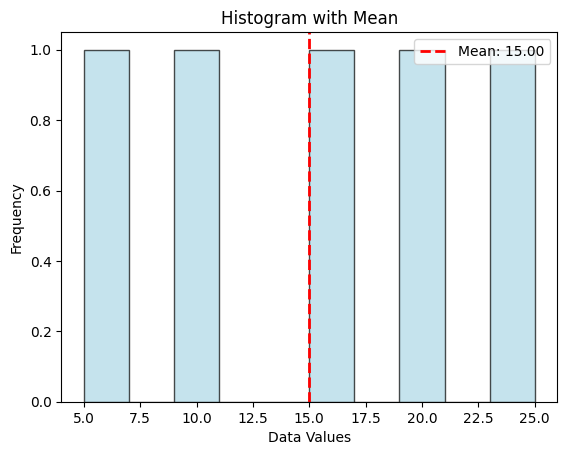

In [115]:
plt.hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.title('Histogram with Mean')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

#### Median and Mode

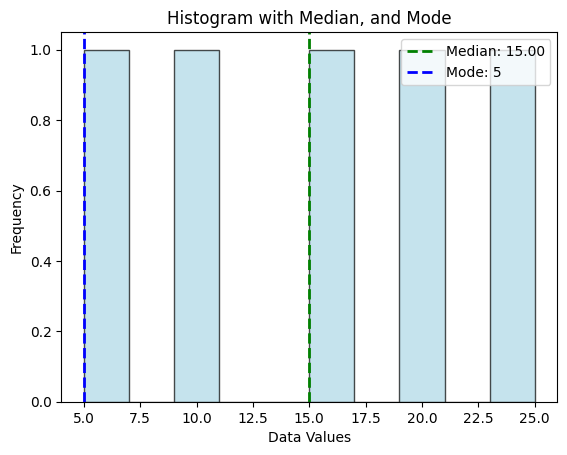

In [116]:
plt.hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode}')

plt.title('Histogram with Median, and Mode')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

### Box-Plot

#### Mean

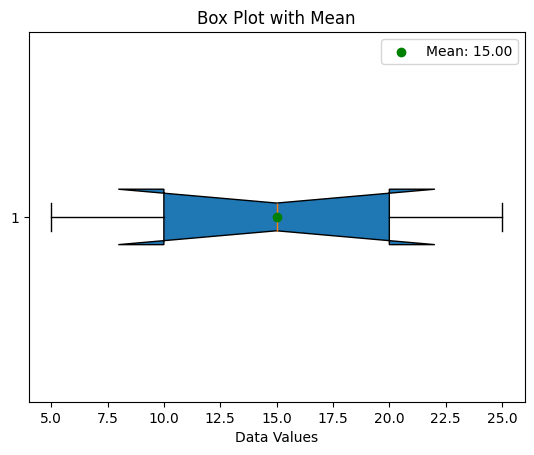

In [117]:
plt.boxplot(data, vert=False, patch_artist=True, notch=True)

plt.scatter(mean, 1, color='green', label=f'Mean: {mean:.2f}', zorder=3)

plt.title('Box Plot with Mean')
plt.xlabel('Data Values')
plt.legend(loc='upper right')
plt.show()

#### Median

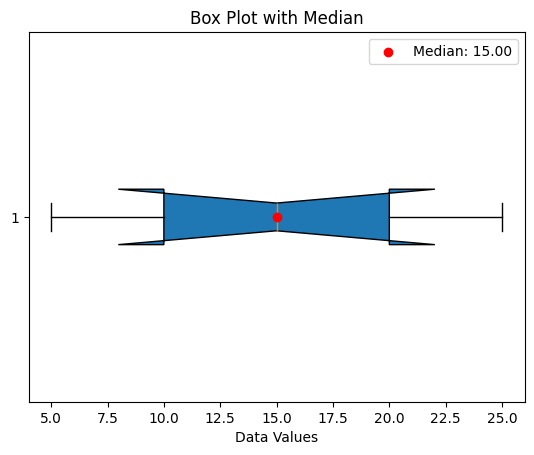

In [118]:
plt.boxplot(data, vert=False, patch_artist=True, notch=True)

plt.scatter(median, 1, color='red', label=f'Median: {median:.2f}', zorder=3)

plt.title('Box Plot with Median')
plt.xlabel('Data Values')
plt.legend(loc='upper right')
plt.show()

### Grouped Data

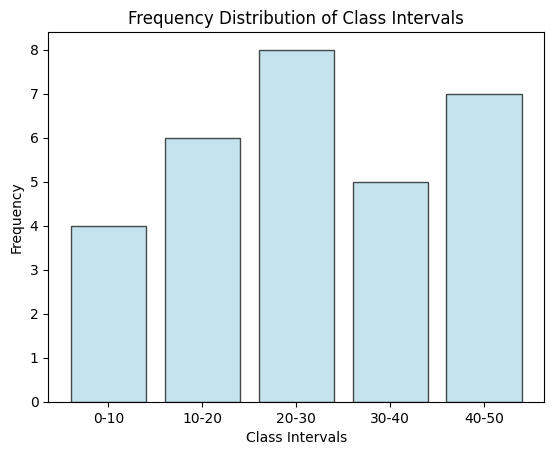

In [120]:
plt.bar(midpoints, frequencies, width=8, color='lightblue', edgecolor='black', alpha=0.7)

plt.xlabel('Class Intervals')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Intervals')

# Setting x-ticks to show the intervals as labels
plt.xticks(midpoints, [f"{interval[0]}-{interval[1]}" for interval in class_intervals])
plt.show()

# Quartile
A quartile is a statistical term used to divide data into four equal parts. Each quartile contains 25% of the dataset, and there are three quartile points: `Q1`, `Q2`, `Q3`

#### Ungrouped Data
__The data should be ordered in ascending order.__

#### First Quartile (Q1):
$$
Q_1 = \left(\frac{N + 1}{4}\right)^{\text{th}} \, \text{value}
$$

#### Second Quartile (Q2) (the median):
$$
Q_2 = \left(\frac{N + 1}{2}\right)^{\text{th}} \, \text{value}
$$

#### Third Quartile (Q3):
$$
Q_3 = \left(\frac{3(N + 1)}{4}\right)^{\text{th}} \, \text{value}
$$

__Example:__

In [136]:
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

print("Q1 (First Quartile):", q1)
print("Q2 (Median or Second Quartile):", q2)
print("Q3 (Third Quartile):", q3)

Q1 (First Quartile): 10.0
Q2 (Median or Second Quartile): 15.0
Q3 (Third Quartile): 20.0


In [137]:
q1 = data_series.quantile(0.25)
q2 = data_series.quantile(0.50)
q3 = data_series.quantile(0.75)

print("Q1 (First Quartile):", q1)
print("Q2 (Median or Second Quartile):", q2)
print("Q3 (Third Quartile):", q3)

Q1 (First Quartile): 10.0
Q2 (Median or Second Quartile): 15.0
Q3 (Third Quartile): 20.0


#### Ungrouped Data
The class interval that contains the quartile value is the quartile class. To find it, you must first compute the cumulative frequencies.
##### First Quartile (Q1):
$$
Q_1 = L + \left(\frac{\frac{N}{4} - F}{f}\right) \times h
$$

##### Second Quartile (Q2):
$$
Q_2 = L + \left(\frac{\frac{N}{2} - F}{f}\right) \times h
$$

##### Third Quartile (Q3):
$$
Q_3 = L + \left(\frac{\frac{3N}{4} - F}{f}\right) \times h
$$

Where:

- \$ L \$ = Lower boundary of the quartile class
- \$ N \$ = Total frequency
- \$ F \$ = Cumulative frequency of the class preceding the quartile class
- \$ f \$ = Frequency of the quartile class
- \$ h \$ = Width of the quartile class


In [138]:
def calculate_quartile(quartile_position):
    quartile_class = df[df['Cumulative Frequency'] >= quartile_position].iloc[0]
    L = quartile_class['Lower']
    F = df[df['Cumulative Frequency'] < quartile_position]['Cumulative Frequency'].max() or 0
    f = quartile_class['Frequency']
    h = quartile_class['Upper'] - quartile_class['Lower']
    Q = L + ((quartile_position - F) / f) * h
    return Q

Q1_position = N / 4
Q2_position = N / 2
Q3_position = 3 * N / 4

Q1 = calculate_quartile(Q1_position)
Q2 = calculate_quartile(Q2_position)
Q3 = calculate_quartile(Q3_position)

print("Q1 (First Quartile):", Q1)
print("Q2 (Second Quartile/Median):", Q2)
print("Q3 (Third Quartile):", Q3)

Q1 (First Quartile): 15.833333333333334
Q2 (Second Quartile/Median): 26.25
Q3 (Third Quartile): 39.0


## Visualization

### Frequency Distribution as a Histogram

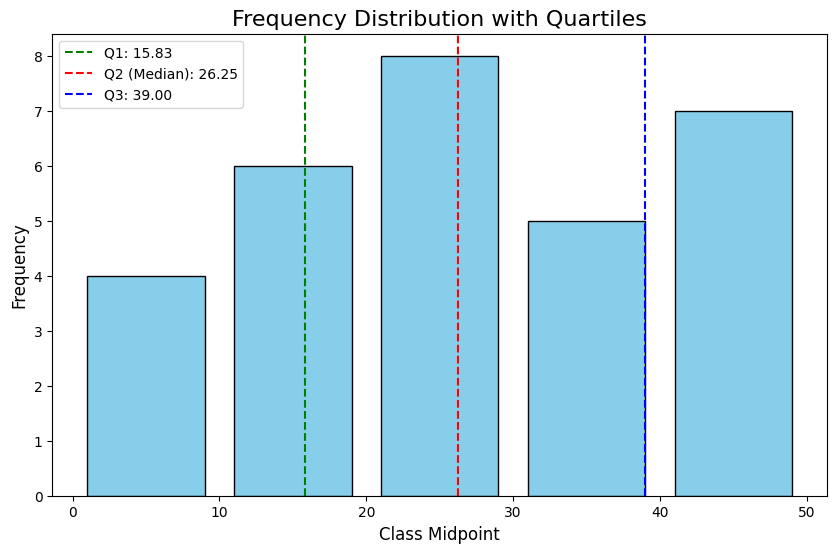

In [139]:
plt.figure(figsize=(10, 6))
plt.bar(df['Midpoint'], df['Frequency'], width=8, edgecolor='black', color='skyblue')

# Add vertical lines for Q1, Q2 (Median), and Q3
plt.axvline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(Q2, color='red', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', label=f'Q3: {Q3:.2f}')

plt.title('Frequency Distribution with Quartiles', fontsize=16)
plt.xlabel('Class Midpoint', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

### Box Plot

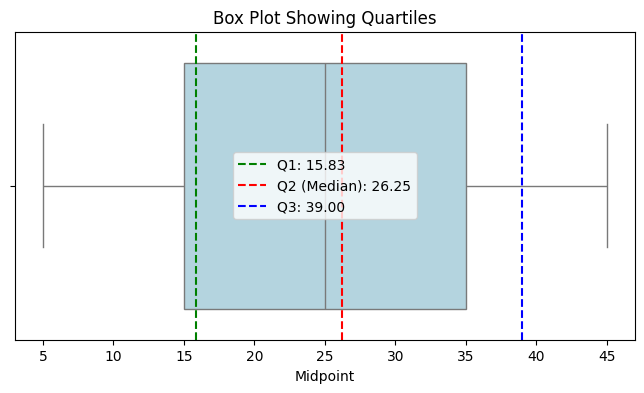

In [140]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Midpoint'].repeat(df['Frequency']), color='lightblue')
plt.axvline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(Q2, color='red', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', label=f'Q3: {Q3:.2f}')
plt.title('Box Plot Showing Quartiles')
plt.legend()
plt.show()